# ****Hotel Booking Data Analysis****

## **Data Loading and Exploration**

### *Import Library*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### *Load the Data*

In [4]:
df = pd.read_csv("hotel_booking.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


### *Data Exploration*

In [5]:
row, column = df.shape
print("Number of rows:", row)
print("Number of columns:", column)

Number of rows: 119390
Number of columns: 36


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Data Cleaning**

### *Missing Value*

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### *Dropping Unused Columns*

In [8]:
df = df.drop(["company", "agent"], axis=1)

In [9]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

## **Data Transformation**

In [10]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])
df["reservation_year"] = df["reservation_status_date"].dt.year

## **Variable Correlation Heatmap**

C:\Users\user\AppData\Local\Temp\ipykernel_11016\1252481322.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


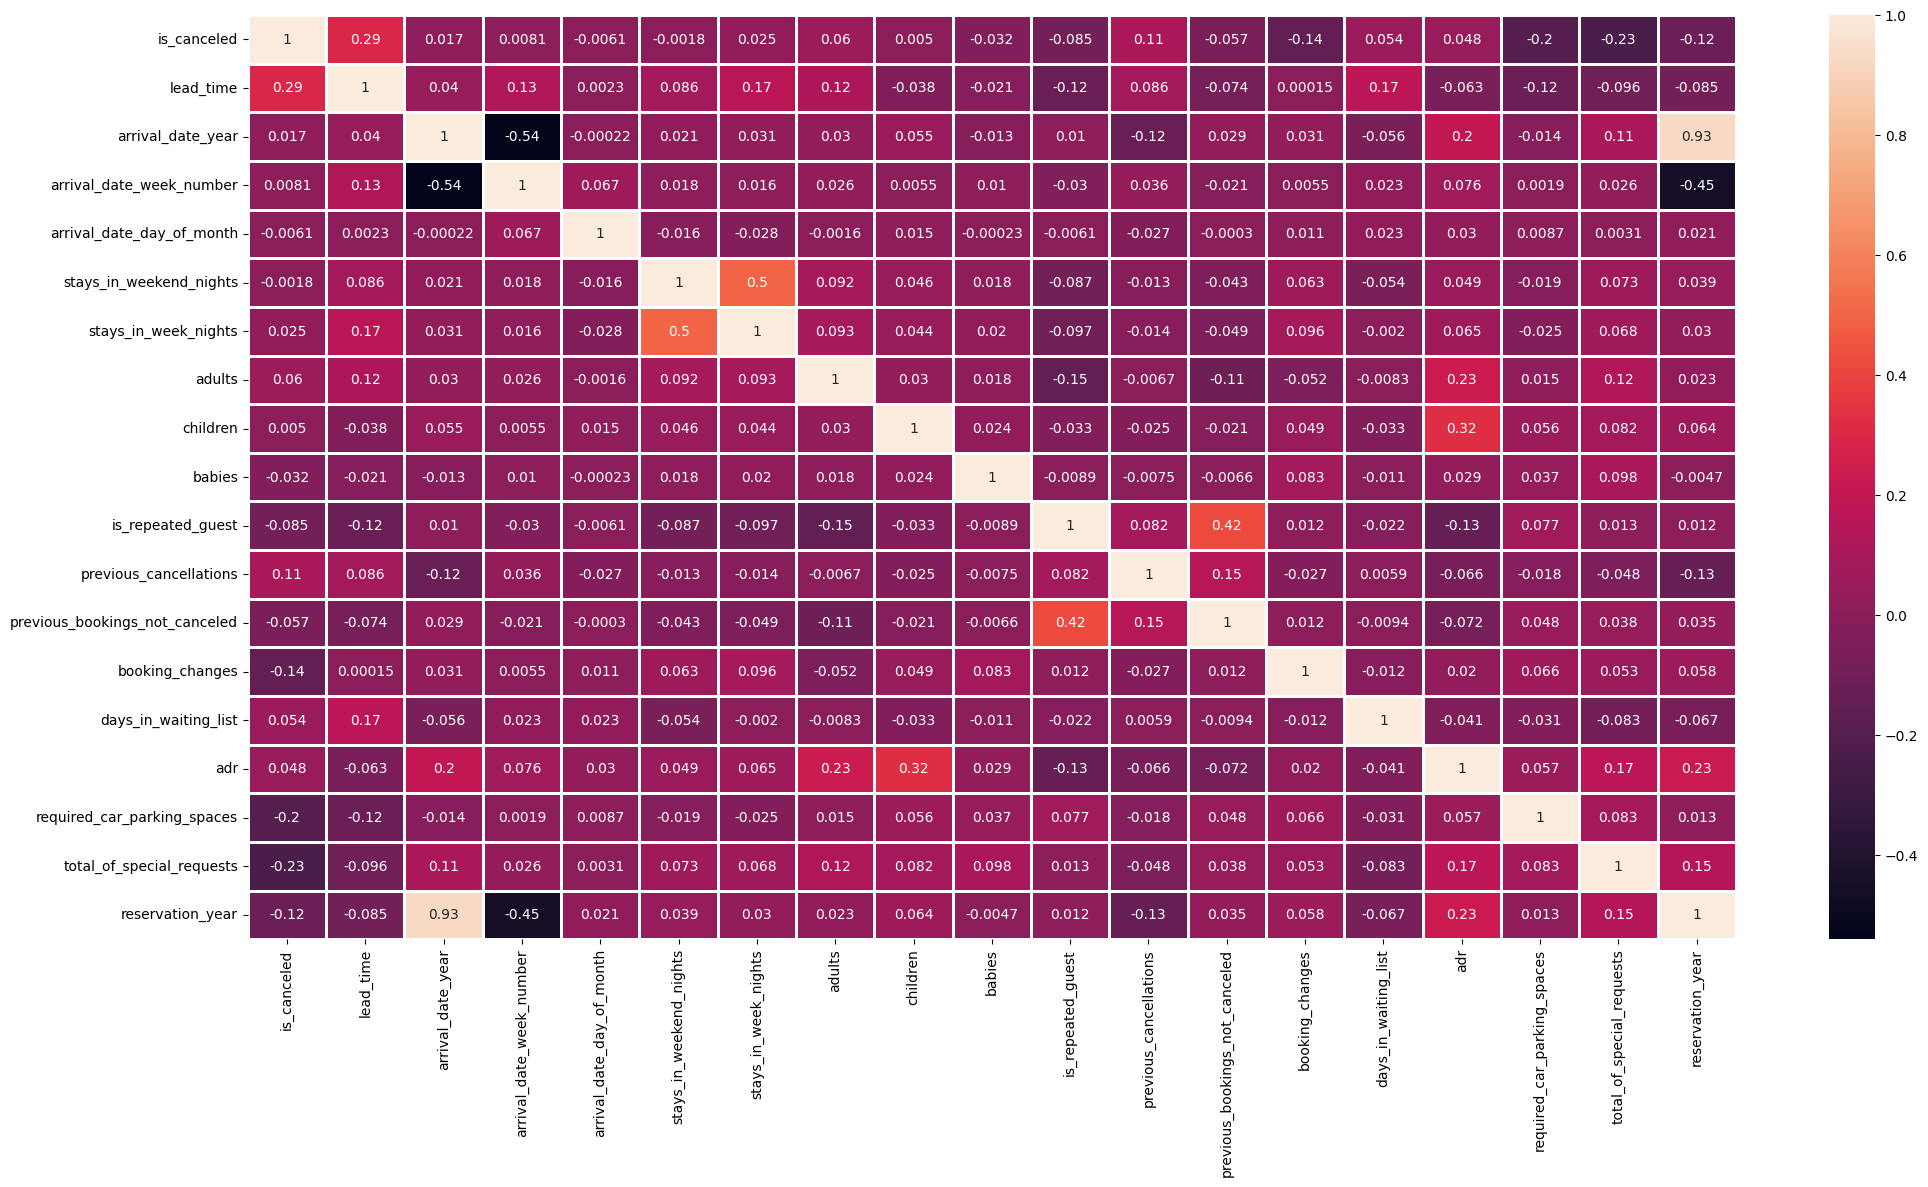

In [11]:
plt.figure(figsize=(24, 12))
corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

## **Data Analysis**

### **Cancelation Analysis**

#### ***Cancelation Rate by Hotel***

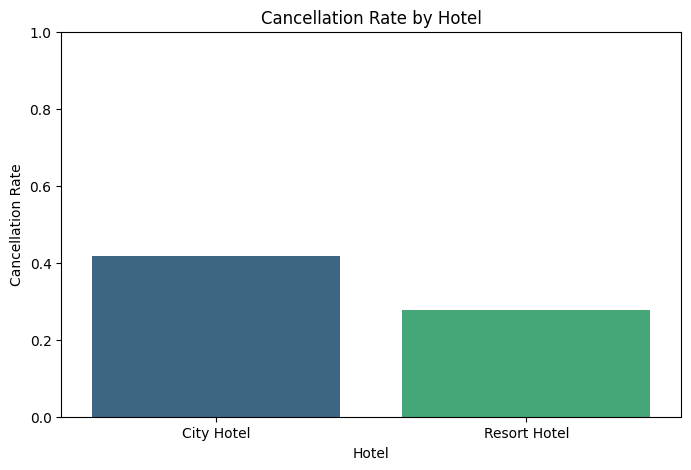

In [13]:
cancellation_rate_by_hotel = df.groupby('hotel')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='hotel', y='is_canceled', data=cancellation_rate_by_hotel, palette='viridis')
plt.xlabel('Hotel')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Hotel')
plt.ylim(0, 1)
plt.show()

#### ***Cancelation Rate by Market Segment***

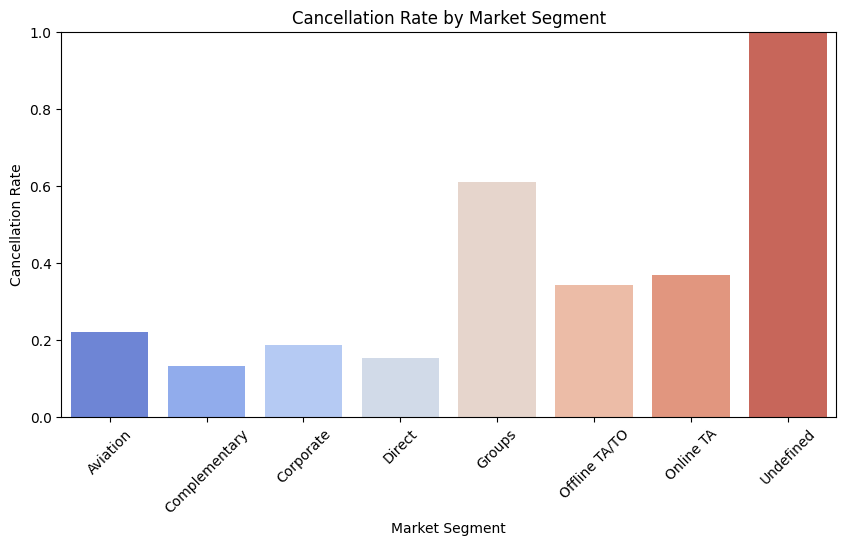

In [14]:
cancellation_rate_by_segment = df.groupby('market_segment')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='market_segment', y='is_canceled', data=cancellation_rate_by_segment, palette='coolwarm')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Market Segment')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

### **Customer Analysis**

#### ***Type of Hotels Booked based on Market Segment***

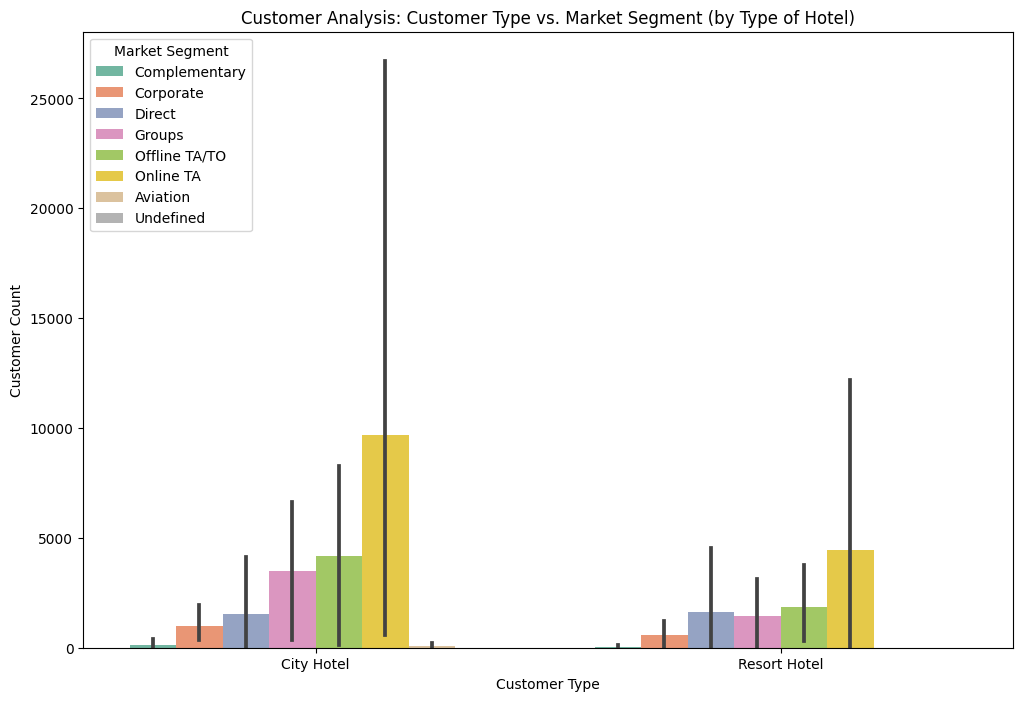

In [15]:
grouped_customers = df.groupby(['customer_type', 'market_segment', 'hotel']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.barplot(x='hotel', y='count', hue='market_segment', data=grouped_customers, palette='Set2')
plt.title('Customer Analysis: Customer Type vs. Market Segment (by Type of Hotel)')
plt.xlabel('Customer Type')
plt.ylabel('Customer Count')
plt.legend(title='Market Segment')
plt.show()

#### ***Customer Type Distribution***

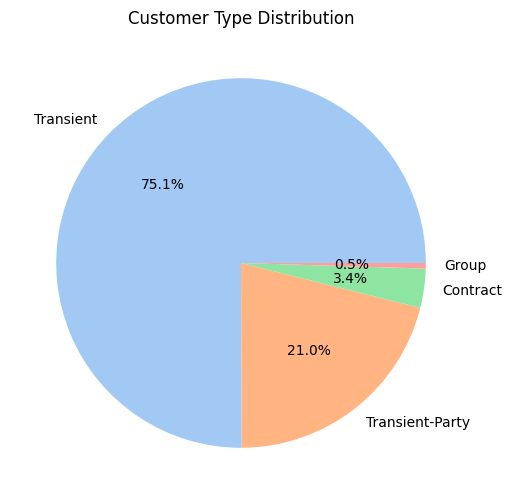

In [16]:
customer_type_counts = df['customer_type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Customer Type Distribution')
plt.show()

#### ***Amount of Adults, Children, and Babies***

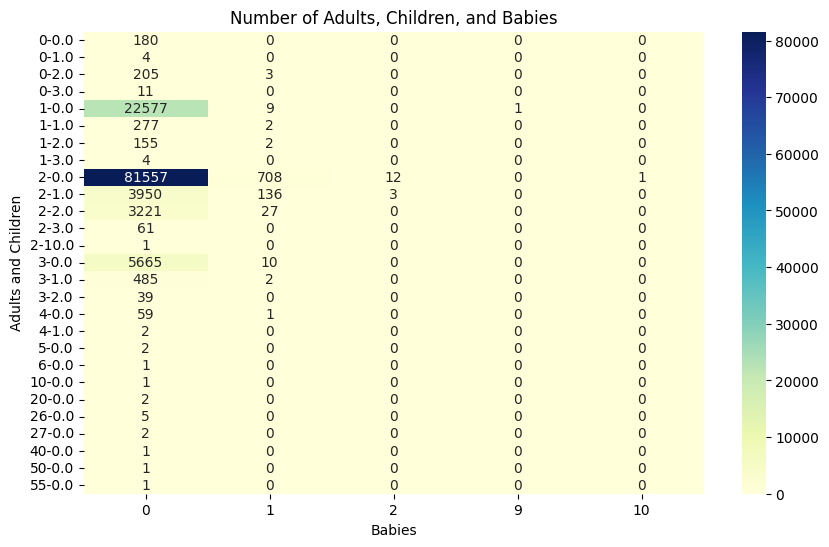

In [17]:
grouped_customers = df.groupby(['adults', 'children', 'babies']).size().reset_index(name='count')
pivot_table = grouped_customers.pivot_table(index=['adults', 'children'], columns='babies', values='count', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', cbar=True)
plt.title('Number of Adults, Children, and Babies')
plt.xlabel('Babies')
plt.ylabel('Adults and Children')
plt.show()

### **Pricing Analysis**

#### ***Average Daily Rate (ADR) by Hotel***

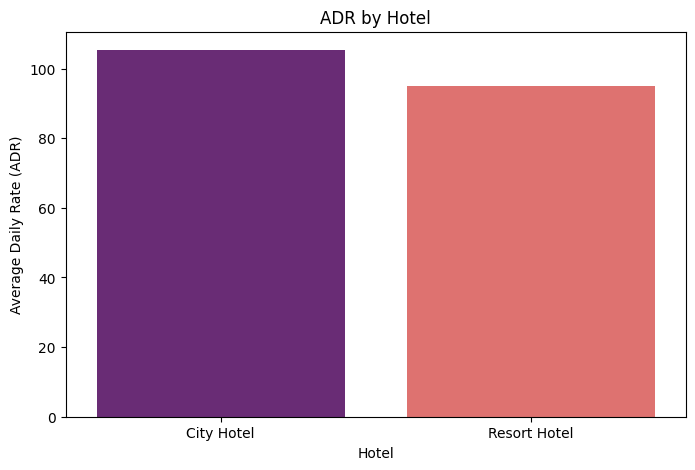

In [18]:
adr_by_hotel = df.groupby('hotel')['adr'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='hotel', y='adr', data=adr_by_hotel, palette='magma')
plt.xlabel('Hotel')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR by Hotel')
plt.show()

#### ***Average Total Price***

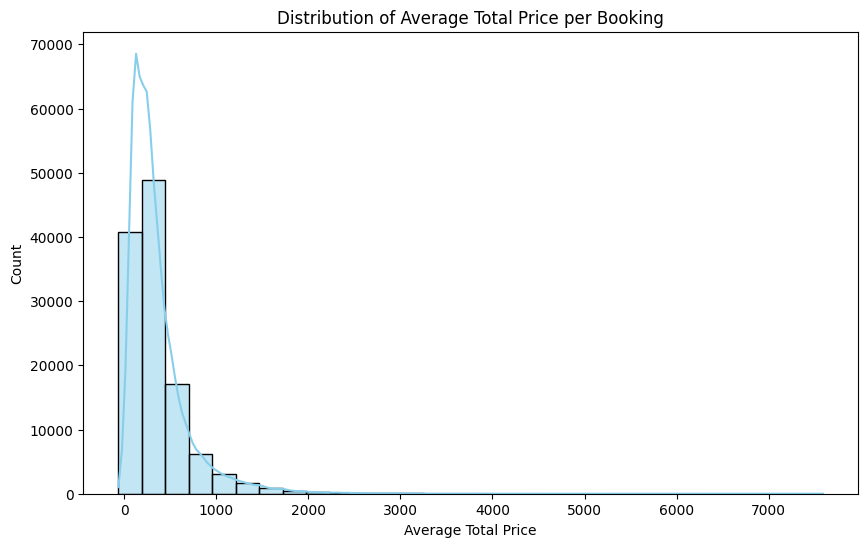

In [19]:
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['average_total_price'] = df['adr'] * df['total_nights']

plt.figure(figsize=(10, 6))
sns.histplot(df['average_total_price'], bins=30, kde=True, color='skyblue')
plt.xlabel('Average Total Price')
plt.ylabel('Count')
plt.title('Distribution of Average Total Price per Booking')
plt.show()

### **Room Analysis**

#### ***Room Type Distribution***

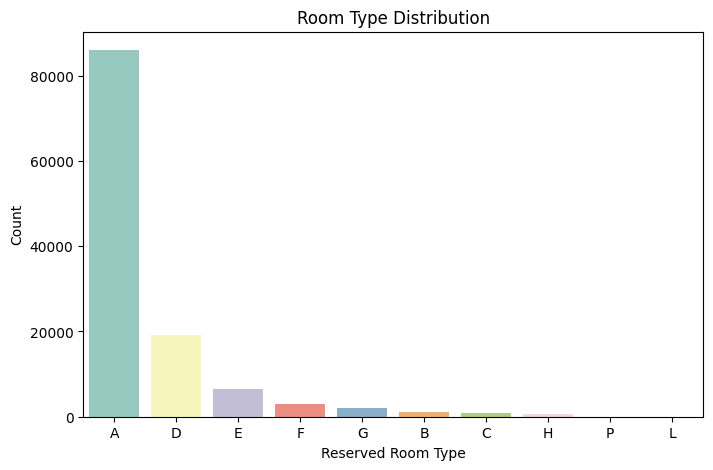

In [20]:
reserved_room_type_counts = df['reserved_room_type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=reserved_room_type_counts.index, y=reserved_room_type_counts.values, palette='Set3')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.show()

#### ***Room Type and Assigned Room***

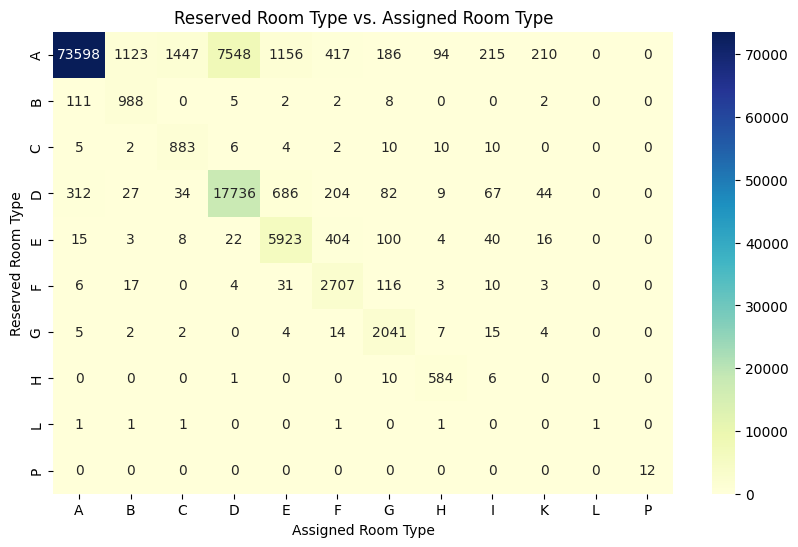

In [21]:
room_type_comparison = pd.crosstab(df['reserved_room_type'], df['assigned_room_type'])

plt.figure(figsize=(10, 6))
sns.heatmap(room_type_comparison, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Reserved Room Type vs. Assigned Room Type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Reserved Room Type')
plt.show()

### **Behaviour Analysis**

#### ***Deposit Types***

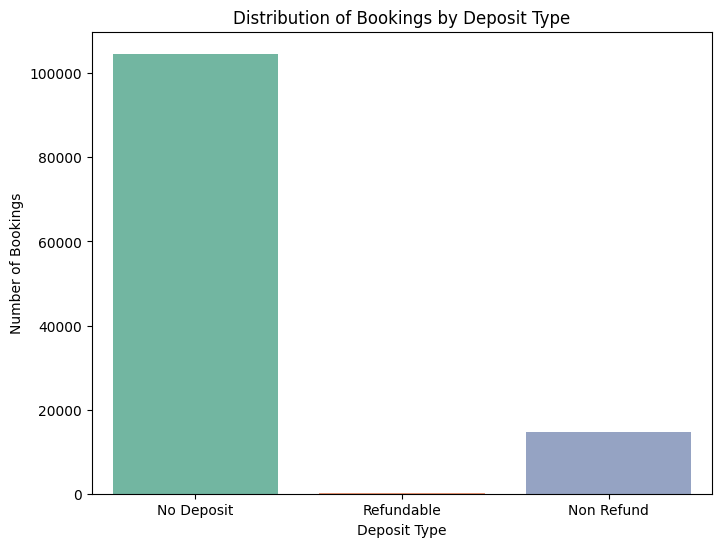

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='deposit_type', data=df, palette='Set2')
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Bookings by Deposit Type')
plt.show()

#### ***Number of Special Request***

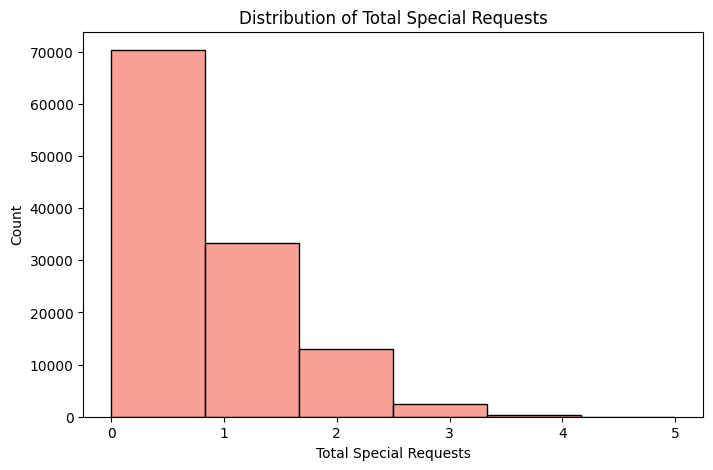

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['total_of_special_requests'], bins=6, kde=False, color='salmon')
plt.xlabel('Total Special Requests')
plt.ylabel('Count')
plt.title('Distribution of Total Special Requests')
plt.show()

#### ***Car Park Space Requirement***

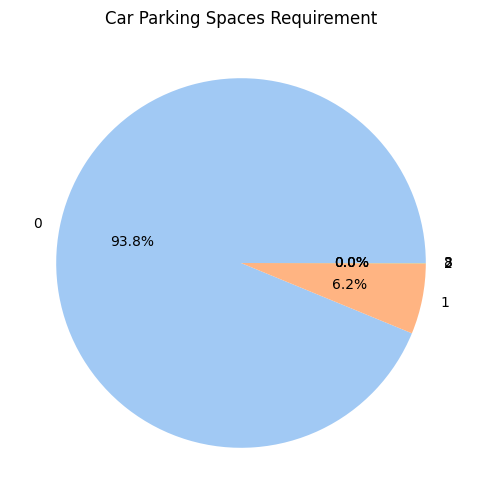

In [24]:
parking_space_counts = df['required_car_parking_spaces'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(parking_space_counts, labels=parking_space_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Car Parking Spaces Requirement')
plt.show()

### **Predictive Model**

#### ***Time Series Forecasting (Cancelation)***

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


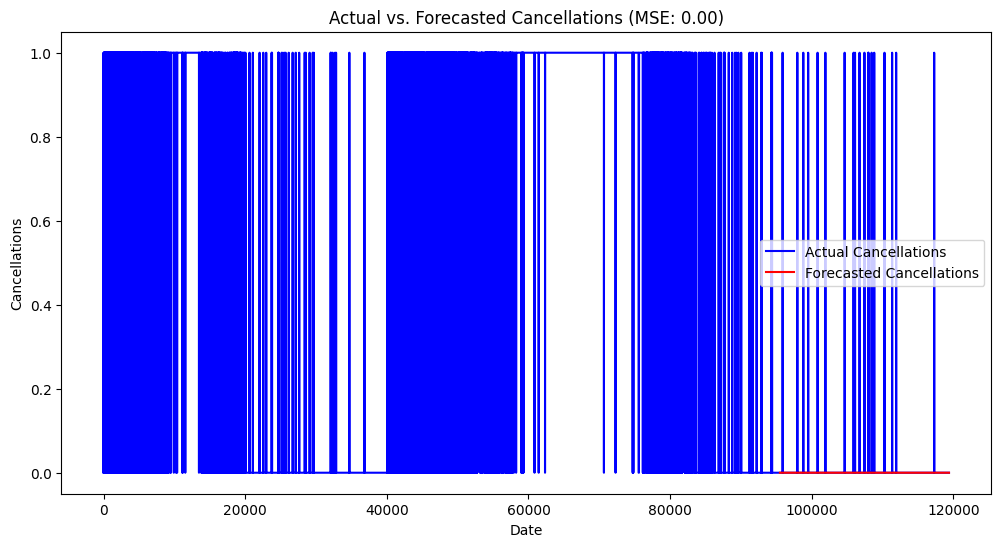

In [25]:
cancellation_series = df['is_canceled']

train_size = int(len(cancellation_series) * 0.8)
train, test = cancellation_series[:train_size], cancellation_series[train_size:]
train_years, test_years = df["reservation_year"][:train_size], df["reservation_year"][train_size:]

order_cancellation = (2, 1, 2)
arima_model_cancellation = ARIMA(train, order=order_cancellation)
arima_fit_cancellation = arima_model_cancellation.fit()

n_forecast_cancellation = len(test)
forecast_cancellations = arima_fit_cancellation.forecast(steps=n_forecast_cancellation)
mse_cancellation = mean_squared_error(test, forecast_cancellations)

plt.figure(figsize=(12, 6))
plt.plot(cancellation_series.index, cancellation_series, label='Actual Cancellations', color='blue')
plt.plot(test.index, forecast_cancellations, label='Forecasted Cancellations', color='red')
plt.xlabel('Date')
plt.ylabel('Cancellations')
plt.title(f'Actual vs. Forecasted Cancellations (MSE: {mse_cancellation:.2f})')
plt.legend()
plt.show()

#### ***Time Series Forecasting (Bookings)***

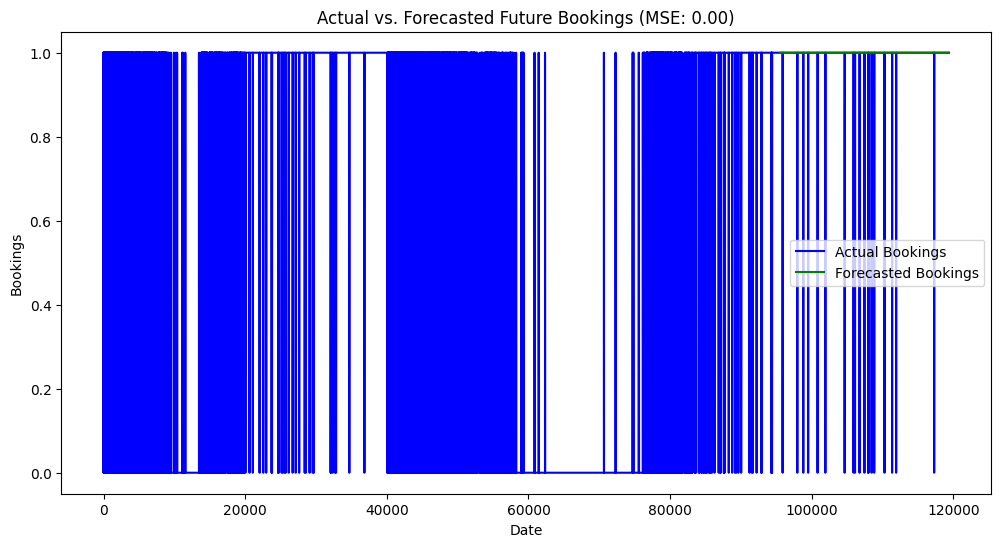

In [26]:
booking_series = df['is_canceled'].apply(lambda x: 0 if x == 1 else 1)

train_size = int(len(booking_series) * 0.8)
train, test = booking_series[:train_size], booking_series[train_size:]
train_years, test_years = df["reservation_year"][:train_size], df["reservation_year"][train_size:]

order_booking = (1, 1, 1)
arima_model_booking = ARIMA(train, order=order_booking)
arima_fit_booking = arima_model_booking.fit()

n_forecast_booking = len(test)
forecast_bookings = arima_fit_booking.forecast(steps=n_forecast_booking)
mse_booking = mean_squared_error(test, forecast_bookings)

plt.figure(figsize=(12, 6))
plt.plot(booking_series.index, booking_series, label='Actual Bookings', color='blue')
plt.plot(test.index, forecast_bookings, label='Forecasted Bookings', color='green')
plt.xlabel('Date')
plt.ylabel('Bookings')
plt.title(f'Actual vs. Forecasted Future Bookings (MSE: {mse_booking:.2f})')
plt.legend()
plt.show()